<a href="https://colab.research.google.com/github/c-susan/datasci_5_statistics/blob/main/r_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Package(s)

In [58]:
library(dplyr)
library(ggplot2)

## **1. Chi-Square Test**

In [32]:
## Loading in the data and getting a sample of 5 rows
df1 <- read.csv('/content/Order_and_Referring_10_3_2023.csv')
df1 %>% sample_n(5, replace = FALSE)

NPI,LAST_NAME,FIRST_NAME,PARTB,DME,HHA,PMD
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1841831351,BOCTOR,MELISSA,Y,Y,Y,Y
1487114781,STROBEL,RAYMOND,Y,Y,Y,Y
1578584322,MADDEN,MARK,Y,Y,Y,Y
1164927646,MUNGER,DANIEL,Y,Y,Y,Y
1619900115,HINKIN,CHARLES,Y,Y,N,N


In [35]:
## Putting the columns 'DME' and 'PMD' into a contingency table and performing a chi-square test
contingency_table <- table(df1$DME, df1$PMD)
chi2_test <- chisq.test(contingency_table)
chi2_test

Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 0.74098, df = 1, p-value = 0.3893


### **Summary**

**Question**: Is there an association between whether a provider can order Durable Medical Equipment (DME) and whether they can order Power Mobility Devices (PMD)?

**H0**: There is no relationship between DME and PMD (independent).

**H1**: There is a relationship between DME and PMD (dependent).

**Interpretation**

Since the p-value of 0.3893 is more than the significance level of 0.05, we do not reject the null hypothesis. There is no relationship between a provider's ability to order DME and their ability to order PMD.

## **2. T-Test**

In [36]:
## Loading in the data and getitng a sample of 5 rows
df2 <- read.csv('https://raw.githubusercontent.com/c-susan/datasci_5_statistics/main/datasets/Specific_Chronic_Conditions.csv')
df2 %>% sample_n(5, replace = FALSE)

Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
County,Texas : Brazoria,48039,65+,All,All,Atrial Fibrillation,0.0928,33343.60,36182.46,NA,NA
County,Missouri : Montgomery,29139,65+,All,All,Asthma,0.0357,18218.17,17583.46,NA,NA
State,West Virginia,54,65+,Race,non-Hispanic Black,Ischemic Heart Disease,0.3075,NA,NA,NA,NA
County,Nebraska : Nance,31125,65+,All,All,COPD,0.1299,27419.98,28974.22,NA,NA
County,Kansas : Harvey,20079,<65,All,All,HIV/AIDS,NA,NA,NA,NA,NA


In [37]:
## Assigning variable df2 with a subset of the dataset where 'Bene_Demo_Desc' is either Female or Male, 'Bene_Age_Lvl' is All, and 'Prvlnc' is not null.
alcohol <- df2 %>% filter(Bene_Demo_Desc %in% c('Female', 'Male'),
                      Bene_Age_Lvl == 'All',
                      Bene_Cond == 'Alcohol Abuse',
                      !is.na(Prvlnc))

## Splitting the data into 2 groups: Female and Male
female <- subset(alcohol, Bene_Demo_Desc == 'Female')$Prvlnc
male <- subset(alcohol, Bene_Demo_Desc == 'Male')$Prvlnc

In [38]:
## Performing the t-test
ttest<- t.test(female, male, var.equal = FALSE)
ttest


	Welch Two Sample t-test

data:  female and male
t = -15.757, df = 81.377, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02182663 -0.01693263
sample estimates:
 mean of x  mean of y 
0.01215000 0.03152963 


In [50]:
# Computing means for Female and Male data with 'Alcohol Abuse'
female_mean <- mean(female)
male_mean <- mean(male)
print(paste('Female Mean: ', female_mean))
print(paste('Male Mean: ', male_mean))

[1] "Female Mean:  0.01215"
[1] "Male Mean:  0.0315296296296296"


### **Summary**

**Question:** Is there a difference in means of alcohol abuse between males and females?

**H0:** There is no difference in means of alcohol abuse between males and females.

**H1:** There is a difference in means of alcohol abuse between males and females.

**Interpretation**

The p-value of p-value is less than 2.2e-16, which is less than the significance level of 0.05. This means that there is a significant difference in means of alcohol abuse between males and females. The t-statisitic is -15.757, which measures the difference between the means of the two groups, indicates that the mean in alcohol abuse for females is lower than compared with males.

## **3. ANOVA**

In [44]:
## Loading in the data and getitng a sample of 3 rows
df3 <- read.csv('https://raw.githubusercontent.com/c-susan/datasci_5_statistics/main/datasets/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
df3 %>% sample_n(3, replace = FALSE)

Data.As.Of,Start.Date,End.Date,Group,Year,Month,State,Sex,Age.Group,COVID.19.Deaths,Total.Deaths,Pneumonia.Deaths,Pneumonia.and.COVID.19.Deaths,Influenza.Deaths,Pneumonia..Influenza..or.COVID.19.Deaths,Footnote
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
09/27/2023,06/01/2021,06/30/2021,By Month,2021,6,Mississippi,Male,Under 1 year,0,19,0,0,0,0,
09/27/2023,07/01/2021,07/31/2021,By Month,2021,7,Alabama,All Sexes,0-17 years,0,78,NA,0,0,NA,One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.
09/27/2023,06/01/2021,06/30/2021,By Month,2021,6,Alaska,Male,85 years and over,NA,38,NA,NA,0,NA,One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.


In [46]:
## Selecting for rows where the column 'sex' equals 'All Sexes', column 'age_group' is not equal 'All Ages',
## and column 'covid-19_deaths' does not have any null values.
df3 <- df3 %>% filter(Sex != 'All Sexes',
                      Age.Group != 'All Ages',
                      !is.na(COVID.19.Deaths))
df3 %>% sample_n(3, replace = FALSE)

Data.As.Of,Start.Date,End.Date,Group,Year,Month,State,Sex,Age.Group,COVID.19.Deaths,Total.Deaths,Pneumonia.Deaths,Pneumonia.and.COVID.19.Deaths,Influenza.Deaths,Pneumonia..Influenza..or.COVID.19.Deaths,Footnote
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
09/27/2023,04/01/2023,04/30/2023,By Month,2023,4,Delaware,Female,0-17 years,0,NA,0,0,0,0,One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.
09/27/2023,08/01/2020,08/31/2020,By Month,2020,8,Delaware,Male,15-24 years,0,NA,0,0,0,0,One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.
09/27/2023,11/01/2020,11/30/2020,By Month,2020,11,Kentucky,Female,85 years and over,219,855,107,79,0,247,


In [48]:
## Performing anova
model <- aov(COVID.19.Deaths ~ Age.Group + Sex, data=df3)
summary(model)

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Age.Group      15 1.753e+09 116850254  29.372 <2e-16 ***
Sex             1 1.414e+07  14138608   3.554 0.0594 .  
Residuals   60310 2.399e+11   3978330                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### **Summary**
**Question:** Does age group and sex have a significant different on the number of Covid-19 deaths?

**H0:** There is no significant effect of age group and sex on the number of COVID-19 deaths.

**H1:** There is a significant effect of age group and sex on the number of COVID-19 deaths.

**Interpretation**
1. There is a significant effect of age group on the number of COVID-19 deaths, since p-value is less than <2e-16, which is less than 0.05.
2. There is no effect of sex on the number of COVID-19 deaths, since the p-value of 0.0594 is greater than 0.05.

## **4. Regression Analysis**

In [51]:
## Loading in the data and getitng a sample of 5 rows
df4 <- read.csv('https://raw.githubusercontent.com/c-susan/datasci_5_statistics/main/datasets/CostReport_2019_Final.csv')
df4 %>% sample_n(5, replace = FALSE)

rpt_rec_num,Provider.CCN,Hospital.Name,Street.Address,City,State.Code,Zip.Code,County,Medicare.CBSA.Number,Rural.Versus.Urban,⋯,Net.Income.from.Service.to.Patients,Total.Other.Income,Total.Income,Total.Other.Expenses,Net.Income,Cost.To.Charge.Ratio,Net.Revenue.from.Medicaid,Medicaid.Charges,Net.Revenue.from.Stand.Alone.SCHIP,Stand.Alone.SCHIP.Charges
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
710881,100265,MEASE HOSPITAL COUNTRYSIDE,3231 NORTH MCMULLEN BOOTH RD,SAFETY HARBOR,FL,33761-2045,PINELLAS,45300,U,⋯,66190134,2653654,68843788,NA,68843788,0.176926,11754183,123869527,52223,725804
718871,190274,OCHSNER MEDICAL CENTER - KENNER LLC,180 WEST ESPLANADE AVE.,KENNER,LA,70065,JEFFERSON PARISH,35380,U,⋯,-4609900,9669989,5060089,NA,5060089,0.209409,23413366,122699047,1369527,5746747
708578,490084,RIVERSIDE TAPPAHANNOCK HOSPITAL,ROUTE 2,TAPPAHANNOCK,VA,22560,ESSEX,99949,R,⋯,6015304,799873,6815177,6398177,417000,0.273345,8114668,27432869,NA,NA
707304,310061,LOURDES MEDICAL CENTER-BURLINGTON,218A SUNSET RD,WILLINGBORO,NJ,08046,BURLINGTON,15804,U,⋯,-2217936,-1058304,-3276240,NA,-3276240,0.140901,12393657,73363982,NA,NA
709428,340027,LENOIR MEMORIAL HOSPITAL,100 AIRPORT ROAD,KINSTON,NC,28501,LENOIR,99934,R,⋯,-6353163,14710108,8356945,7187619,1169326,0.355059,9689767,48255806,125534,634993


In [53]:
## Selecting specific columns to be used in the regression analysis and filling in NaN's with zeros.
df4$Salaries..Wages..and.Fees.Payable <- ifelse(is.na(df4$Salaries..Wages..and.Fees.Payable), 0, df4$Salaries..Wages..and.Fees.Payable)
df4$FTE...Employees.on.Payroll <- ifelse(is.na(df4$FTE...Employees.on.Payroll), 0, df4$FTE...Employees.on.Payroll)

In [55]:
## Performing regression analysis
model <- lm(df4$FTE...Employees.on.Payroll ~ df4$Salaries..Wages..and.Fees.Payable)
summary(model)


Call:
lm(formula = df4$FTE...Employees.on.Payroll ~ df4$Salaries..Wages..and.Fees.Payable)

Residuals:
     Min       1Q   Median       3Q      Max 
-16121.3   -440.0   -337.1     45.9  22671.7 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           5.198e+02  1.599e+01   32.50   <2e-16 ***
df4$Salaries..Wages..and.Fees.Payable 4.863e-05  7.126e-07   68.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1198 on 6116 degrees of freedom
Multiple R-squared:  0.4323,	Adjusted R-squared:  0.4322 
F-statistic:  4656 on 1 and 6116 DF,  p-value: < 2.2e-16


Warning message:
“Use of `df4$FTE...Employees.on.Payroll` is discouraged.
ℹ Use `FTE...Employees.on.Payroll` instead.”
Warning message:
“Use of `df4$Salaries..Wages..and.Fees.Payable` is discouraged.
ℹ Use `Salaries..Wages..and.Fees.Payable` instead.”
Warning message:
“Use of `df4$FTE...Employees.on.Payroll` is discouraged.
ℹ Use `FTE...Employees.on.Payroll` instead.”
Warning message:
“Use of `df4$Salaries..Wages..and.Fees.Payable` is discouraged.
ℹ Use `Salaries..Wages..and.Fees.Payable` instead.”
`geom_smooth()` using formula = 'y ~ x'


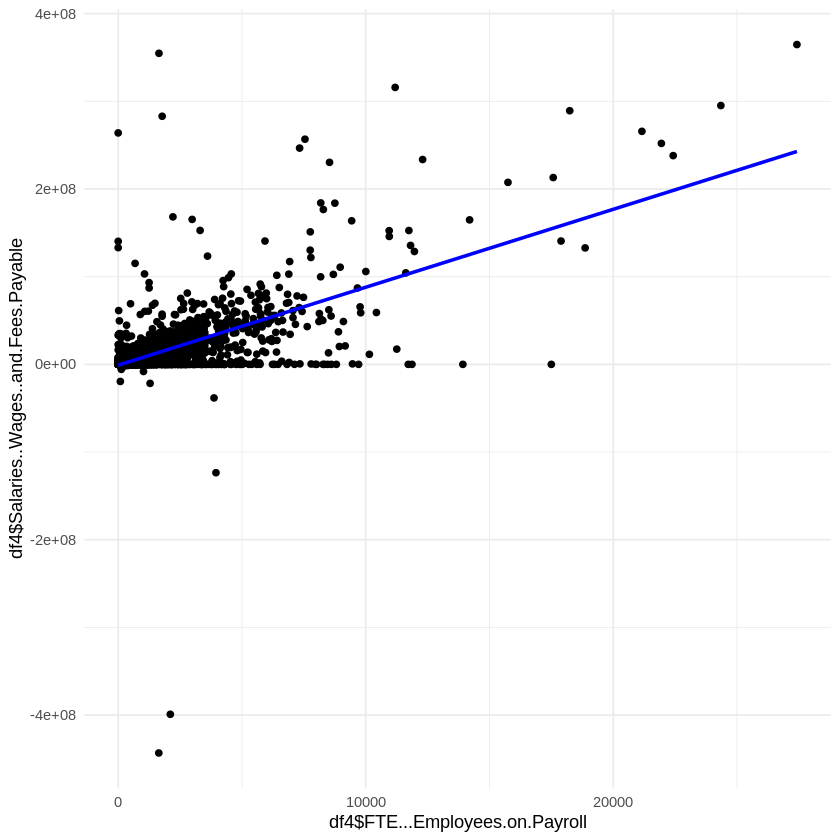

In [59]:
ggplot(df4, aes(x = df4$FTE...Employees.on.Payroll, y = df4$Salaries..Wages..and.Fees.Payable)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  theme_minimal()